In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define the path to the dataset
train_data_dir = '/content/drive/MyDrive/emotion/images/'
class_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprised']

# Image data generator with rescaling and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # Splitting the data into training and validation sets
)

# Generate training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify training data
)

# Generate validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation data
)

# Create a Sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and a 3x3 kernel size
model.add(Conv2D(64, (3, 3), activation='relu'))
# Add another max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 2D arrays to a 1D array
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with 8 neurons (assuming 8 classes) and softmax activation
model.add(Dense(8, activation='softmax'))

# Compile the model using categorical cross-entropy loss and the Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=4,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 387 images belonging to 8 classes.
Found 253 images belonging to 8 classes.
Epoch 1/4
12/12 [==============================] - 322s 28s/step - loss: 2.1588 - accuracy: 0.1211 - val_loss: 2.0775 - val_accuracy: 0.1161
Epoch 2/4
12/12 [==============================] - 78s 7s/step - loss: 2.0755 - accuracy: 0.1690 - val_loss: 2.0751 - val_accuracy: 0.1875
Epoch 3/4
12/12 [==============================] - 81s 7s/step - loss: 2.0721 - accuracy: 0.1775 - val_loss: 2.0683 - val_accuracy: 0.1786
Epoch 4/4
12/12 [==============================] - 62s 5s/step - loss: 2.0729 - accuracy: 0.1606 - val_loss: 2.0683 - val_accuracy: 0.1741


Found 253 images belonging to 8 classes.
43/43 [==============================] - 26s 603ms/step


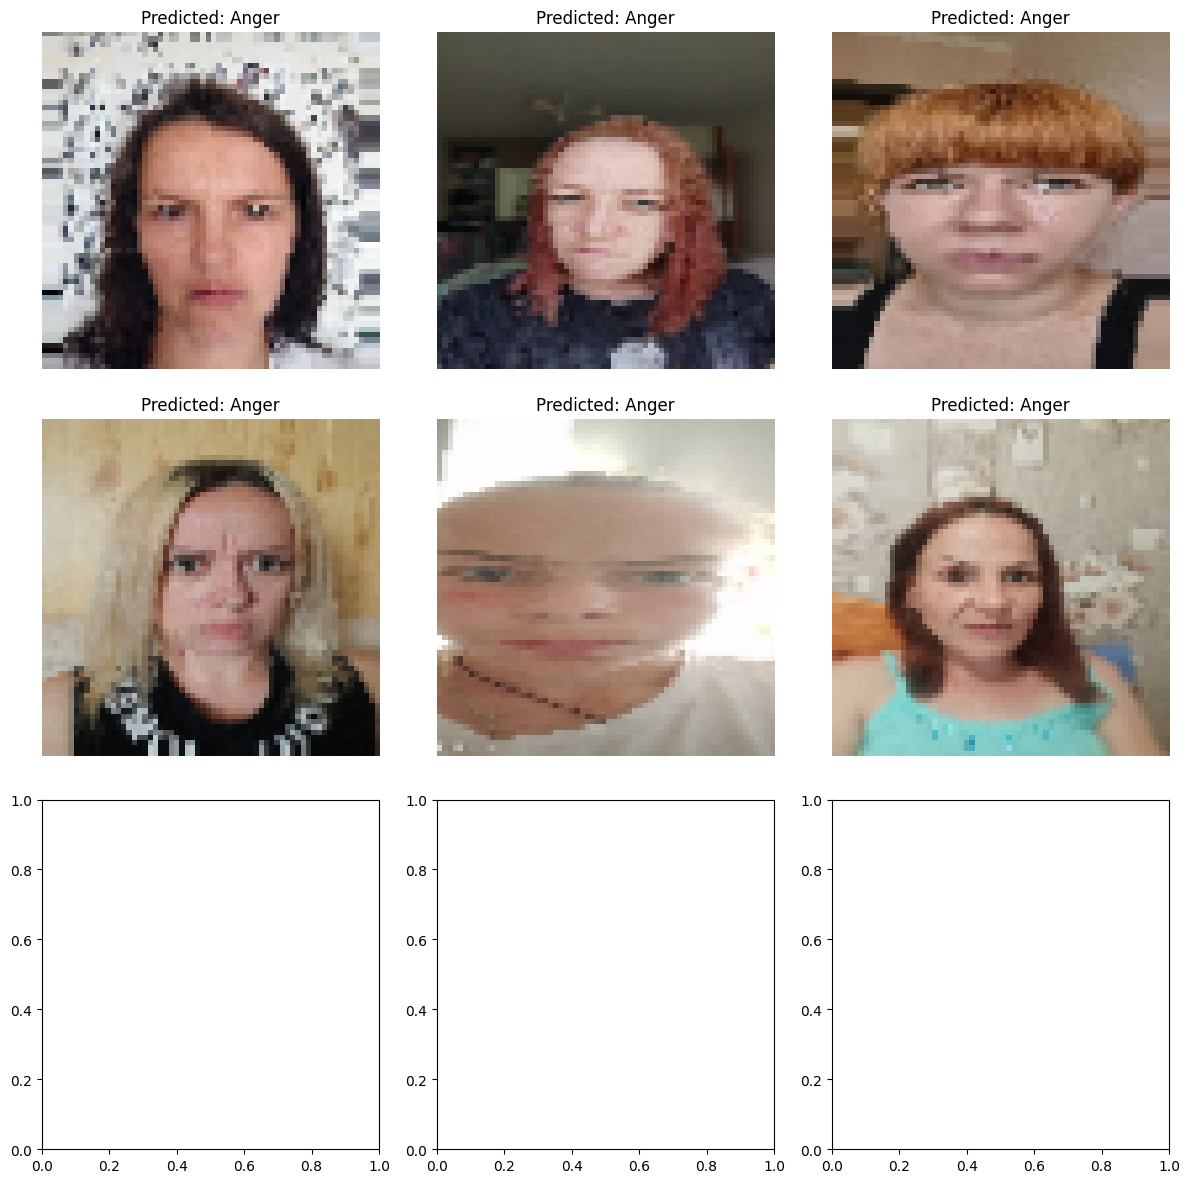

In [6]:
import matplotlib.pyplot as plt

# Function to plot images with their predicted labels
def plot_images(images_and_labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()
    for i, (image, label) in enumerate(images_and_labels):
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f'Predicted: {label}')
    plt.tight_layout()
    plt.show()

# Load a few images for testing
test_data_dir = '/content/drive/MyDrive/emotion/images/'
class_names = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprised']
# Get a batch of test images
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=6,  # Number of images to test and visualize
    class_mode='categorical',
    subset='validation',  # Use validation data for testing
    shuffle=False  # To maintain the order of images for visualization
)

# Predict classes for the test images
predictions = model.predict(test_generator)
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

# Pair up images with their predicted labels for visualization
images_and_labels = list(zip(test_generator[0][0], predicted_labels))

# Plot the test images with their predicted labels
plot_images(images_and_labels, 3, 3)

In [4]:
from PIL import Image
import numpy as np

# Function to preprocess image from file path
def preprocess_image_from_file(file_path):
    img = Image.open(file_path)
    img = img.resize((64, 64))  # Resize the image to match the input size of the model
    img = np.array(img)  # Convert image to NumPy array
    img = img / 255.0  # Normalize pixel values between 0 and 1
    return img.reshape(1, 64, 64, 3)  # Reshape image for model input

# File path of the image you want to classify
image_path = '/content/drive/MyDrive/emotion/images/Anger/Anger1.jpg'  # Replace with your image file path

# Preprocess the image from the file path
processed_image = preprocess_image_from_file(image_path)

# Use the trained model for prediction
predicted_class = np.argmax(model.predict(processed_image), axis=-1)
predicted_label = class_names[predicted_class[0]]

# Print the predicted label
print(f"The predicted label for the image is: {predicted_label}")

1/1 [==============================] - 0s 96ms/step
The predicted label for the image is: Anger


1/1 [==============================] - 0s 44ms/step
The predicted label for the image is: Anger


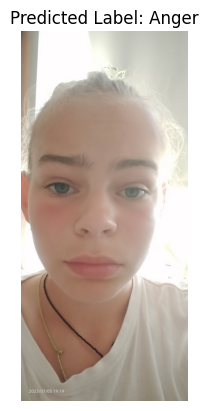

8/8 [==============================] - 34s 4s/step - loss: 2.0683 - accuracy: 0.1700
Test Accuracy: 17.00%


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess image from file path
def preprocess_image_from_file(file_path):
    img = Image.open(file_path)
    img = img.resize((64, 64))  # Resize the image to match the input size of the model
    img = np.array(img)  # Convert image to NumPy array
    img = img / 255.0  # Normalize pixel values between 0 and 1
    return img.reshape(1, 64, 64, 3)  # Reshape image for model input

# File path of the image you want to classify
image_path = '/content/drive/MyDrive/emotion/images/Sad/Sad11.jpg'  # Replace with your image file path

# Preprocess the image from the file path
processed_image = preprocess_image_from_file(image_path)

# Use the trained model for prediction
predicted_class = np.argmax(model.predict(processed_image), axis=-1)
predicted_label = class_names[predicted_class[0]]

# Print the predicted label
print(f"The predicted label for the image is: {predicted_label}")

# Load and display the image with the predicted label
img = Image.open(image_path)
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

# Calculate accuracy and other metrics on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')